In [1]:
import pandas as pd
import numpy as np
import pubchempy as pcp
from sklearn.decomposition import PCA
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem

pd.set_option('mode.chained_assignment',  None) # we dont want unnecessary warning

In [2]:
data_root = Path("./input_data")

exp_file = data_root.joinpath("exp_filtered.csv")

print(exp_file)


input_data/exp_filtered.csv


In [3]:
print(exp_file.is_file())

True


In [4]:
df_exp = pd.read_csv(exp_file)

In [5]:
df_exp

,COSMIC.ID,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,H3C2,H3C3,AC098582.1,DUS4L.BCAP29,C8orf44.SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
0,684072,4.327687,0.070389,5.979339,2.906891,4.904484,0.263034,2.235727,0.422233,4.433627,...,1.416840,2.000000,0.042644,1.959770,0.432959,0.070389,0.042644,0.378512,0.070389,0.000000
1,687448,3.266037,0.000000,6.096979,2.521051,3.040892,0.000000,0.831877,6.576069,4.657068,...,0.333424,0.879706,0.839960,2.384050,0.000000,0.028569,0.163499,0.000000,0.028569,0.000000
2,687562,4.374344,0.000000,6.963821,2.292782,4.001802,0.495695,2.729009,6.396947,5.355792,...,2.056584,0.000000,0.333424,2.792855,0.584963,0.000000,0.238787,0.070389,0.000000,0.028569
3,687568,3.477677,0.000000,6.762615,2.107688,4.371559,0.028569,1.321928,5.440288,4.072963,...,1.910733,1.035624,0.367371,1.673556,0.097611,0.000000,0.042644,0.124328,0.000000,0.389567
4,687590,3.244887,0.000000,7.124535,1.933573,3.493135,0.014355,3.168321,6.090642,4.505891,...,1.695994,1.613532,0.594549,4.015248,0.286881,0.000000,0.028569,0.000000,0.000000,0.411426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1330948,0.176323,0.000000,6.348197,2.280956,3.636915,1.831877,5.785551,5.497293,6.055065,...,1.937344,0.432959,0.454176,2.920293,0.189034,0.042644,0.014355,0.042644,0.042644,0.000000
658,1503364,4.585563,0.000000,7.524973,2.211012,2.786596,0.000000,0.310340,5.228819,4.791293,...,1.144046,0.782409,0.263034,1.220330,0.111031,0.000000,0.000000,0.000000,0.000000,0.000000
659,1659818,0.137504,0.000000,6.757423,3.176323,5.111449,0.097611,0.189034,3.688180,4.213347,...,0.650765,1.422233,0.604071,2.223423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
660,1659819,0.000000,0.000000,7.059939,2.761285,4.144862,0.443607,0.000000,0.056584,4.491853,...,1.443607,1.906891,1.070389,1.448901,0.641546,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
std_2_to_19194 = df_exp.iloc[:, 1:19194].std()

print("2열부터 19194열까지의 열의 표준편차:")
print(std_2_to_19194)

2열부터 19194열까지의 열의 표준편차:
TSPAN6      1.636366
TNMD        0.226464
DPM1        0.610333
SCYL3       0.567319
C1orf112    0.690382
              ...   
ELOA3B      0.065843
NPBWR1      0.659847
ELOA3D      0.069546
ELOA3       0.097073
CDR1        0.144252
Length: 19193, dtype: float64


In [7]:
q1 = std_2_to_19194.quantile(0.25)
median = std_2_to_19194.quantile(0.5)
q3 = std_2_to_19194.quantile(0.75)

print("표준편차의 1사분위수:", q1)
print("표준편차의 중앙값:", median)
print("표준편차의 3사분위수:", q3)

표준편차의 1사분위수: 0.5760327332808185
표준편차의 중앙값: 0.748986884325046
표준편차의 3사분위수: 1.1204030393247908


In [8]:
selected_columns = std_2_to_19194.index[std_2_to_19194 >= std_2_to_19194.median()]

# 선택한 열만을 포함하는 데이터프레임 생성
filtered_data = df_exp[selected_columns]

# 결과 출력

print(filtered_data)


       TSPAN6       FGR       CFH     FUCA2      GCLC     STPG1    NIPAL3  \
0    4.327687  0.263034  2.235727  0.422233  4.433627  1.516015  2.759156   
1    3.266037  0.000000  0.831877  6.576069  4.657068  2.545968  4.564988   
2    4.374344  0.495695  2.729009  6.396947  5.355792  2.790772  4.251719   
3    3.477677  0.028569  1.321928  5.440288  4.072963  3.137504  4.774524   
4    3.244887  0.014355  3.168321  6.090642  4.505891  2.469886  4.402586   
..        ...       ...       ...       ...       ...       ...       ...   
657  0.176323  1.831877  5.785551  5.497293  6.055065  2.684819  3.663345   
658  4.585563  0.000000  0.310340  5.228819  4.791293  2.837943  2.972693   
659  0.137504  0.097611  0.189034  3.688180  4.213347  1.981853  4.593354   
660  0.000000  0.443607  0.000000  0.056584  4.491853  2.419539  2.684819   
661  6.345361  0.042644  0.014355  5.785289  3.060047  4.023255  2.629939   

        ENPP4    SEMA3F      CFTR  ...   UPK3BL2  AC093512.2  ARHGAP11B  \


In [9]:
import umap

/home/jiseo/anaconda3/envs/automl/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jiseo/anaconda3/envs/automl/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jiseo/anaconda3/envs/automl/lib/python3.10/site-packages/umap/dist

In [10]:
import umap

# 이진 데이터를 포함한 데이터프레임을 가정합니다.
# X는 이진 특성을 포함한 데이터
X = filtered_data

# UMAP 모델 생성
reducer = umap.UMAP(n_components=2)  # 2차원으로 투영하도록 설정

# 데이터를 저차원으로 변환
X_umap = reducer.fit_transform(X)
X_umap_embedded = reducer.fit_transform(X)
# X_embedded는 2차원 데이터입니다.

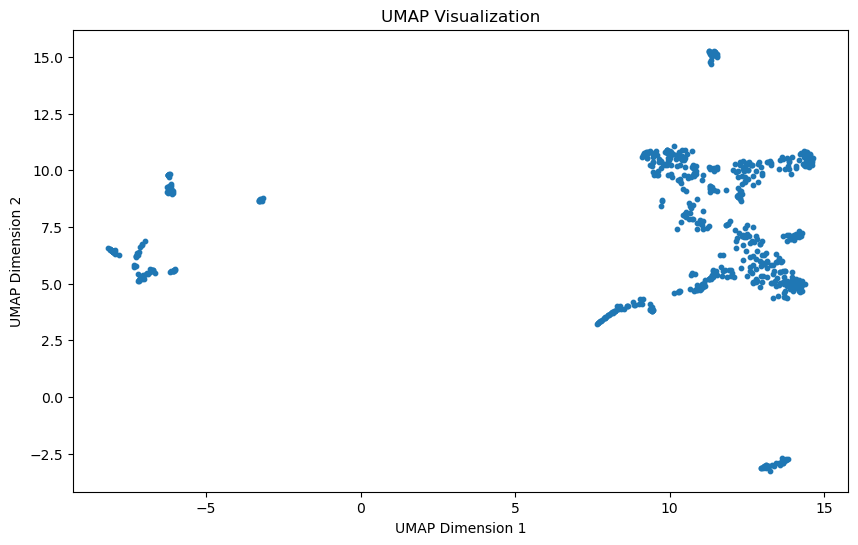

In [11]:
import umap
import matplotlib.pyplot as plt

# UMAP 결과 데이터 (예시 데이터, 실제 데이터에 대체해야 함)
X_umap = X_umap_embedded  # UMAP 결과 데이터, (n_samples, n_components) 형태의 2D 배열

# 시각화
plt.figure(figsize=(10, 6))  # 그림 크기 설정
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10)  # 2D UMAP 결과 데이터를 산점도로 그림

plt.title('UMAP Visualization')  # 그래프 제목 설정
plt.xlabel('UMAP Dimension 1')  # X 축 레이블 설정
plt.ylabel('UMAP Dimension 2')  # Y 축 레이블 설정
plt.show()  # 그림 표시


In [12]:
# 데이터프레임 생성
df_umap_median = pd.DataFrame(data=X_umap_embedded, columns=['Dimension 1', 'Dimension 2'])

# 데이터프레임 확인
print(df_umap_median.head())
print(df_umap_median)


   Dimension 1  Dimension 2
0    10.297883     4.651371
1    13.565095    -2.985167
2    14.064609     5.132660
3    14.215374     4.669453
4    13.657153     5.041000
     Dimension 1  Dimension 2
0      10.297883     4.651371
1      13.565095    -2.985167
2      14.064609     5.132660
3      14.215374     4.669453
4      13.657153     5.041000
..           ...          ...
657    -6.241484     9.780394
658    12.429264    10.172640
659    -7.949024     6.324018
660    -6.905594     5.486086
661    10.686586     5.369306

[662 rows x 2 columns]


In [13]:
cosmic_id = df_exp['COSMIC.ID']
df_exp_umap_features = pd.concat([cosmic_id, df_umap_median], axis=1)
df_exp_umap_features

,COSMIC.ID,Dimension 1,Dimension 2
0,684072,10.297883,4.651371
1,687448,13.565095,-2.985167
2,687562,14.064609,5.132660
3,687568,14.215374,4.669453
4,687590,13.657153,5.041000
...,...,...,...
657,1330948,-6.241484,9.780394
658,1503364,12.429264,10.172640
659,1659818,-7.949024,6.324018
660,1659819,-6.905594,5.486086


In [14]:
with open("gene_exp_median_umap.txt", "w") as file:
    for row in df_exp_umap_features:
        line = "\t".join(str(cell) for cell in row)  # 탭 문자로 열 구분
        file.write(line + "\n")

In [22]:
# CSV 파일을 읽어옴
with open("/home/jiseo/week4/UMAP/gene_exp_median_umap_Oct18.csv", "r") as csv_file:
    csv_contents = csv_file.read()

# 읽어온 내용을 .txt 파일로 저장
with open("gene_exp_median_umap.txt", "w") as txt_file:
    txt_file.write(csv_contents)

In [2]:
# .txt 파일을 읽어옴
with open("/home/jiseo/week4/data/oct_19_txt/umap/exp_median.txt", "r") as txt_file:
    txt_contents = txt_file.read()

# 쉼표를 탭 문자로 대체하고 수정된 내용을 변수에 저장
txt_contents_with_tabs = txt_contents.replace(",", "\t")

# 수정된 내용을 .txt 파일로 저장
with open("umap_median_이거.txt", "w") as modified_file:
    modified_file.write(txt_contents_with_tabs)

## 3분위수로 진행

In [15]:
selected_columns = std_2_to_19194.index[std_2_to_19194 >= std_2_to_19194.quantile(0.75)]

# 선택한 열만을 포함하는 데이터프레임 생성
filtered_data2 = df_exp[selected_columns]

# 결과 출력

print(filtered_data2)

       TSPAN6       FGR       CFH     FUCA2      GCLC     ENPP4    SEMA3F  \
0    4.327687  0.263034  2.235727  0.422233  4.433627  1.189034  3.381283   
1    3.266037  0.000000  0.831877  6.576069  4.657068  0.163499  1.536053   
2    4.374344  0.495695  2.729009  6.396947  5.355792  3.510962  2.017922   
3    3.477677  0.028569  1.321928  5.440288  4.072963  0.042644  0.565597   
4    3.244887  0.014355  3.168321  6.090642  4.505891  2.521051  0.176323   
..        ...       ...       ...       ...       ...       ...       ...   
657  0.176323  1.831877  5.785551  5.497293  6.055065  2.849999  0.555816   
658  4.585563  0.000000  0.310340  5.228819  4.791293  2.659925  0.704872   
659  0.137504  0.097611  0.189034  3.688180  4.213347  2.153805  0.163499   
660  0.000000  0.443607  0.000000  0.056584  4.491853  3.129283  0.226509   
661  6.345361  0.042644  0.014355  5.785289  3.060047  1.859970  0.604071   

         CFTR      CD99      AOC1  ...      NEFL      CCL3    ZNF229  \
0  

In [16]:
import umap

# 이진 데이터를 포함한 데이터프레임을 가정합니다.
# X는 이진 특성을 포함한 데이터
X2 = filtered_data2

# UMAP 모델 생성
reducer = umap.UMAP(n_components=2)  # 2차원으로 투영하도록 설정

# 데이터를 저차원으로 변환
X_umap2 = reducer.fit_transform(X2)
X_umap_embedded2 = reducer.fit_transform(X2)
# X_embedded는 2차원 데이터입니다.

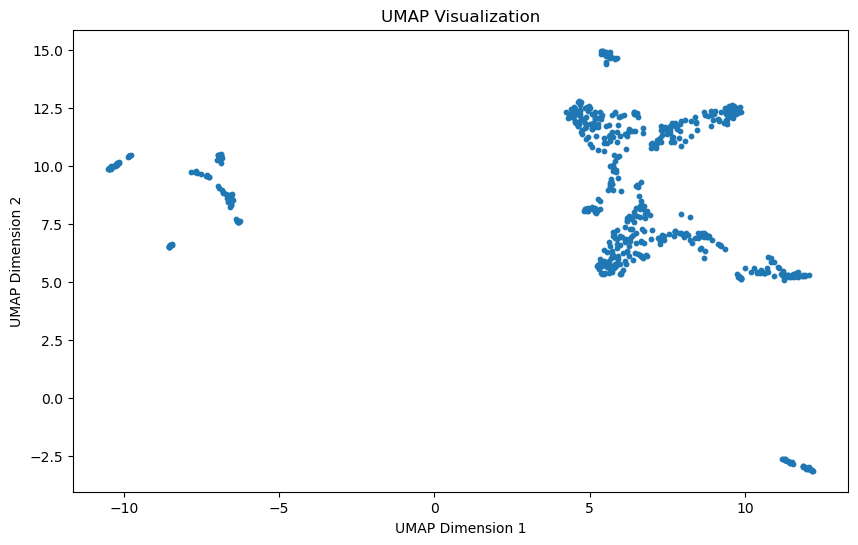

In [17]:
import umap
import matplotlib.pyplot as plt

# UMAP 결과 데이터 (예시 데이터, 실제 데이터에 대체해야 함)
X_umap2 = X_umap_embedded2  # UMAP 결과 데이터, (n_samples, n_components) 형태의 2D 배열

# 시각화
plt.figure(figsize=(10, 6))  # 그림 크기 설정
plt.scatter(X_umap2[:, 0], X_umap2[:, 1], s=10)  # 2D UMAP 결과 데이터를 산점도로 그림

plt.title('UMAP Visualization')  # 그래프 제목 설정
plt.xlabel('UMAP Dimension 1')  # X 축 레이블 설정
plt.ylabel('UMAP Dimension 2')  # Y 축 레이블 설정
plt.show()  # 그림 표시

In [18]:
# 데이터프레임 생성
df_umap_q3 = pd.DataFrame(data=X_umap_embedded2, columns=['Dimension 1', 'Dimension 2'])

# 데이터프레임 확인
print(df_umap_q3.head())
print(df_umap_q3)

   Dimension 1  Dimension 2
0     9.232237     6.572880
1    11.542906    -2.819421
2     5.317740     5.989756
3     5.365639     5.412453
4     5.889278     5.845491
     Dimension 1  Dimension 2
0       9.232237     6.572880
1      11.542906    -2.819421
2       5.317740     5.989756
3       5.365639     5.412453
4       5.889278     5.845491
..           ...          ...
657    -9.839321    10.435615
658     7.438699    11.689809
659    -6.879471    10.440557
660    -6.637157     8.634791
661     8.709827     6.364590

[662 rows x 2 columns]


In [19]:
cosmic_id = df_exp['COSMIC.ID']
df_exp_umap_features2 = pd.concat([cosmic_id, df_umap_q3], axis=1)
df_exp_umap_features2

,COSMIC.ID,Dimension 1,Dimension 2
0,684072,9.232237,6.572880
1,687448,11.542906,-2.819421
2,687562,5.317740,5.989756
3,687568,5.365639,5.412453
4,687590,5.889278,5.845491
...,...,...,...
657,1330948,-9.839321,10.435615
658,1503364,7.438699,11.689809
659,1659818,-6.879471,10.440557
660,1659819,-6.637157,8.634791


In [20]:
with open("gene_exp_q3_umap.txt", "w") as file:
    for row in df_exp_umap_features2:
        line = "\t".join(str(cell) for cell in row)  # 탭 문자로 열 구분
        file.write(line + "\n")

In [21]:
# CSV 파일을 읽어옴
with open("/home/jiseo/week4/UMAP/gene_exp_q3_umap_Oct18.csv", "r") as csv_file:
    csv_contents = csv_file.read()

# 읽어온 내용을 .txt 파일로 저장
with open("gene_exp_q3_umap.txt", "w") as txt_file:
    txt_file.write(csv_contents)


In [ ]:
# .txt 파일을 읽어옴
with open("/home/jiseo/week4/UMAP/gene_exp_median_umap_Oct18.csv", "r") as txt_file:
    txt_contents = txt_file.read()

# 쉼표를 탭 문자로 대체하고 수정된 내용을 변수에 저장
txt_contents_with_tabs = txt_contents.replace(",", "\t")

# 수정된 내용을 .txt 파일로 저장
with open("umap_median_이거.txt", "w") as modified_file:
    modified_file.write(txt_contents_with_tabs)

In [3]:
# .txt 파일을 읽어옴
with open("/home/jiseo/week4/data/oct_19_txt/umap/exp_q3.txt", "r") as txt_file:
    txt_contents = txt_file.read()

# 쉼표를 탭 문자로 대체하고 수정된 내용을 변수에 저장
txt_contents_with_tabs = txt_contents.replace(",", "\t")

# 수정된 내용을 .txt 파일로 저장
with open("umap_q3_이거.txt", "w") as modified_file:
    modified_file.write(txt_contents_with_tabs)